In [230]:
import pandas as pd
data_df = pd.read_csv("D:\AMRIT\PGCBAMD\courses\Marketing Analytics\TITANIC_DATA_set.csv")
data_df.head(n=2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [231]:
data_df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [232]:
data_df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [233]:
data_df = data_df.copy()

data_df["age"].fillna(data_df["age"].median(skipna=True), inplace=True)
#data_df["pclass"].fillna(data_df["pclass"].median(skipna=True), inplace=True)
data_df["pclass"].fillna(data_df["pclass"].value_counts().idxmax(), inplace=True)
#data_df["survived"].fillna(data_df["survived"].median(skipna=True), inplace=True)
data_df["survived"].fillna(data_df["survived"].value_counts().idxmax(), inplace=True)
data_df["embarked"].fillna(data_df['embarked'].value_counts().idxmax(), inplace=True)
data_df["sex"].fillna(data_df['sex'].value_counts().idxmax(), inplace=True)
data_df["sibsp"].fillna(data_df["sibsp"].median(skipna=True), inplace=True)
data_df["parch"].fillna(data_df["parch"].median(skipna=True), inplace=True)
data_df["fare"].fillna(data_df["fare"].mean(skipna=True), inplace=True)
data_df["ticket"].fillna(data_df["ticket"].value_counts().idxmax(), inplace=True)
data_df["cabin"].fillna(data_df["cabin"].value_counts().idxmax(), inplace=True)
data_df["boat"].fillna(data_df["boat"].value_counts().idxmax(), inplace=True)

data_df["home.dest"].fillna(data_df['home.dest'].value_counts().idxmax(), inplace=True)
#data_df["boat"].fillna(data_df['boat'].median(skipna=True), inplace=True)
data_df["body"].fillna(data_df["body"].median(skipna=True), inplace=True)


In [234]:
##Performing the type casting
data_df['survived'] = data_df.survived.astype(int)
data_df['pclass'] = data_df.pclass.astype(int)

In [235]:
data_df.dtypes

pclass         int32
survived       int32
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [236]:
data_df.isnull().sum()

pclass       0
survived     0
name         1
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

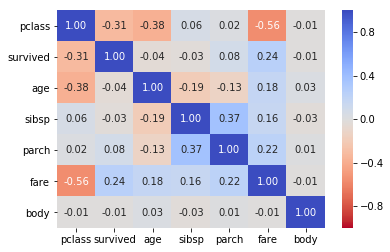

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = sns.heatmap(data_df[["pclass","survived","sex","embarked","age","sibsp","parch","fare","body","home.dest"]].corr(), cmap="coolwarm_r",vmin=-1,vmax=1,annot=True, fmt=".2f")

In [238]:
print("*********** Data Visualization  ***************")

*********** Data Visualization  ***************


             0    1  total
1st class  123  200    323
2nd class  158  119    277
3rd class  529  181    710


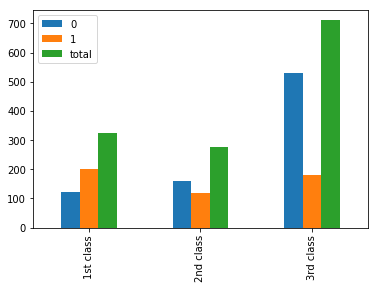

In [239]:
survived_1 = data_df[data_df['pclass']==1]['survived'].value_counts()
survived_2 = data_df[data_df['pclass']==2]['survived'].value_counts()
survived_3 = data_df[data_df['pclass']==3]['survived'].value_counts()
df = pd.DataFrame([survived_1,survived_2,survived_3])
df['total']=df[0]+df[1]
df.index = ['1st class','2nd class','3rd class']
df.rename(index=str,columns={0:'Survived',1:'Died'})
print (df)
df.plot(kind='bar',label=['Survived','Died'])

C:\Users\Amrit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


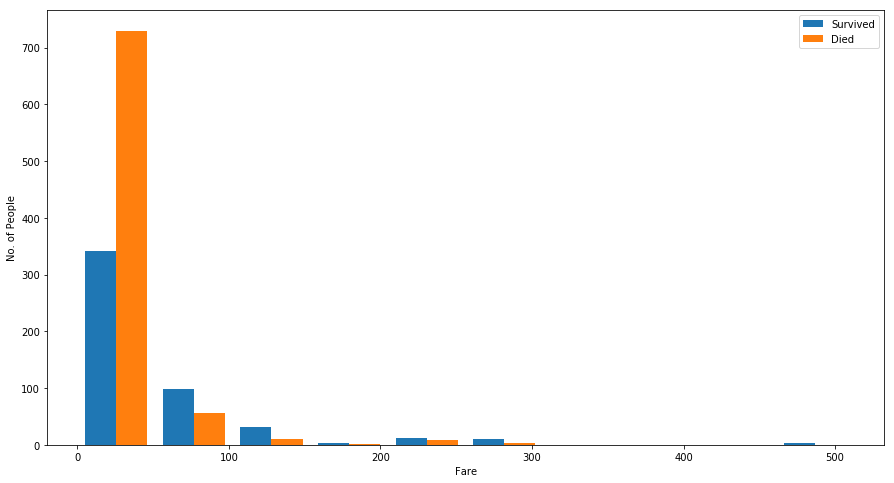

In [240]:
figure = plt.figure(figsize=(15,8))
plt.hist([data_df[data_df['survived']==1]['fare'],data_df[data_df['survived']==0]['fare']],bins=10,label=['Survived','Died'])
plt.xlabel('Fare')
plt.ylabel('No. of People')
plt.legend()

C:\Users\Amrit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


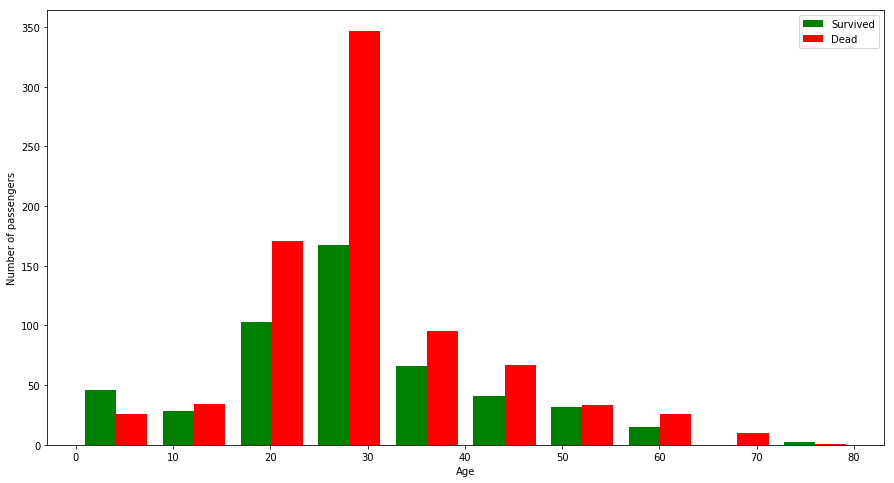

In [241]:
figure = plt.figure(figsize=(15,8))
plt.hist([data_df[data_df['survived']==1]['age'],data_df[data_df['survived']==0]['age']], color = ['g','r'],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

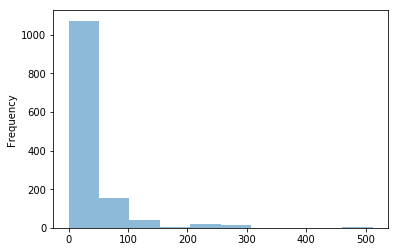

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_df['fare'].plot.hist(alpha=0.5)

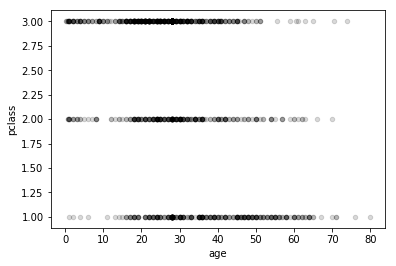

In [243]:
data_df.plot.scatter(x='age', y='pclass', c='k', alpha=.15)

In [244]:
data_df.head(n=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160,211.3375,B5,S,2,155.0,"St Louis, MO"


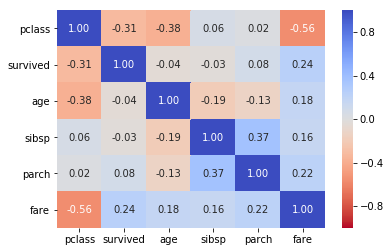

In [245]:
ax = sns.heatmap(data_df[["pclass","survived","sex","embarked","age","sibsp","parch","fare"]].corr(), cmap="coolwarm_r",vmin=-1,vmax=1,annot=True, fmt=".2f")

In [246]:
data_df.drop('cabin', axis=1, inplace=True)
data_df.drop('body', axis=1, inplace=True)
data_df.drop('ticket', axis=1, inplace=True)
data_df.drop('boat', axis=1, inplace=True)
data_df.drop('name', axis=1, inplace=True)
data_df.drop('home.dest', axis=1, inplace=True)

In [247]:
data_df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [248]:
data_df.head(n=2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0.0,0.0,211.3375,S
1,1,1,male,0.9167,1.0,2.0,151.5500,S


In [249]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
pclass      1310 non-null int32
survived    1310 non-null int32
sex         1310 non-null object
age         1310 non-null float64
sibsp       1310 non-null float64
parch       1310 non-null float64
fare        1310 non-null float64
embarked    1310 non-null object
dtypes: float64(4), int32(2), object(2)
memory usage: 71.7+ KB


In [250]:
data_df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.295420,0.381679,29.502036,0.498473,0.384733,33.295479
std,0.837742,0.485984,12.900383,1.041352,0.865295,51.719113
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [251]:
print("******* categorical data with one hot encoding ************")

******* categorical data with one hot encoding ************


In [252]:
data_set_df = data_df[['pclass','sex','age','sibsp','parch','fare','embarked']]
data_set_df = pd.get_dummies(data_set_df)
data_set_df.head()
X = data_set_df
y = data_df['survived']

In [253]:
X.head(n=2)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0.0,0.0,211.3375,1,0,0,0,1
1,1,0.9167,1.0,2.0,151.5500,0,1,0,0,1


In [254]:
y.head(n=4)

0    1
1    1
2    0
3    0
Name: survived, dtype: int32

In [255]:
#def embark(x):
 #   if x == 'S':
  #      return 1
   # elif x == 'C':
    #    return 2
    #else:
     #   return 3

#data_df['embarkedd'] = data_df['embarked'].apply(lambda x: embark(x))

#data_df['embarked'].unique()

#def gender(x):
    #if x == 'male':
     #   return 1
    #elif x == 'female':
     #   return 2


#data_df['gender'] = data_df['sex'].apply(lambda x: embark(x))
#print(data_df['gender'])


In [256]:
data_set_df.head(n=2)

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0.0,0.0,211.3375,1,0,0,0,1
1,1,0.9167,1.0,2.0,151.5500,0,1,0,0,1


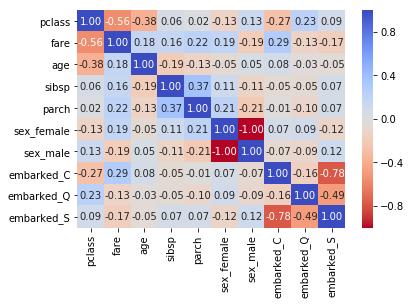

In [257]:
ax = sns.heatmap(data_set_df[["pclass","fare","age","sibsp","parch","sex_female","sex_male","embarked_C","embarked_Q","embarked_S"]].corr(), cmap="coolwarm_r",vmin=-1,vmax=1,annot=True, fmt=".2f")

In [258]:
from sklearn import linear_model

In [259]:
data_set_df.shape

(1310, 10)

In [260]:
#import pandas as pd
#X= data_df[['pclass','gender','age','sibsp','parch','fare','embarkedd']]

#y = data_df[['survived']]

In [262]:
print("****** Creating the Machine Learning Models  *******")

****** Creating the Machine Learning Models  *******


In [263]:
print("******** Logistic Regression :- ********")

******** Logistic Regression :- ********


In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [265]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss



logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [266]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [267]:
y_pred = logreg.predict(X_test)

In [268]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[146  17]
 [ 35  64]]


In [269]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       163
          1       0.79      0.65      0.71        99

avg / total       0.80      0.80      0.80       262



In [270]:
print(" ******  Support Vector Machine :- *******")

 ******  Support Vector Machine :- *******


In [271]:
######### SVM   ##########
from sklearn import svm
svm_clf = svm.SVC(gamma=0.005, C=200)

svm_clf.fit(X_train, y_train)
svm_clf_predictions = svm_clf.predict(X_test)

In [272]:
accuracy_score(y_test, svm_clf_predictions)

0.7824427480916031

In [273]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test, svm_clf_predictions))

             precision    recall  f1-score   support

          0       0.80      0.87      0.83       163
          1       0.75      0.64      0.69        99

avg / total       0.78      0.78      0.78       262



In [274]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, svm_clf_predictions)
print(confusion_matrix)

[[142  21]
 [ 36  63]]


In [275]:
print("********** Random Forest :- *************")

********** Random Forest :- *************


In [276]:
### Random forest
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier() #default 
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)
rf_clf_predict = rf.predict(X_test)

In [277]:
accuracy_score(y_test, rf_clf_predict)

0.7862595419847328

In [278]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test, rf_clf_predict))

             precision    recall  f1-score   support

          0       0.79      0.90      0.84       163
          1       0.79      0.60      0.68        99

avg / total       0.79      0.79      0.78       262



In [279]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, rf_clf_predict)
print(confusion_matrix)

[[147  16]
 [ 40  59]]


In [280]:
print("********** Decision Tree  :- *************")

********** Decision Tree  :- *************


In [281]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier()

In [282]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [283]:
from sklearn.metrics import accuracy_score

y_predict_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_predict_dt)

0.7442748091603053

In [284]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict_dt)
print(confusion_matrix)

[[134  29]
 [ 38  61]]


In [285]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict_dt))

             precision    recall  f1-score   support

          0       0.78      0.82      0.80       163
          1       0.68      0.62      0.65        99

avg / total       0.74      0.74      0.74       262

